In [1]:
pip install pandas requests lxml

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.0 MB/s eta 0:00:00:00:010:01

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Enviar la solicitud GET y obtener el contenido de la página
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"
}
response = requests.get(url, headers=headers)
html_data = response.text

# Analizar el contenido HTML
soup = BeautifulSoup(html_data, "html.parser")

# Usar pandas para leer las tablas en la página
tables = pd.read_html(str(soup))

# Iterar sobre las tablas para encontrar la que contiene "Tesla Quarterly Revenue (Millions of US $)"
for table in tables:
    if "Tesla Quarterly Revenue (Millions of US $)" in table.to_string():
        tesla_revenue = table
        tesla_revenue.columns = ["Date", "Revenue"]  # Renombrar columnas
        tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")  # Limpiar datos
        #print(tesla_revenue)
        tesla_revenue
        break
else:
    print("No se encontró la tabla 'Tesla Quarterly Revenue (Millions of US $)'.")


/tmp/ipykernel_2345/2806644267.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [3]:
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2024-09-30,25182
1,2024-06-30,25500
2,2024-03-31,21301
3,2023-12-31,25167
4,2023-09-30,23350


In [4]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [7]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE revenue (Date, Revenue)""")

In [5]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[np.record(('2024-09-30', '25182'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2024-06-30', '25500'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2024-03-31', '21301'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2023-12-31', '25167'), dtype=[('Date', 'O'), ('Revenue', 'O')]),
 np.record(('2023-09-30', '23350'), dtype=[('Date', 'O'), ('Revenue', 'O')])]

In [8]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()

In [9]:
# Check the data from the database
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-09-30', '25182')
('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('

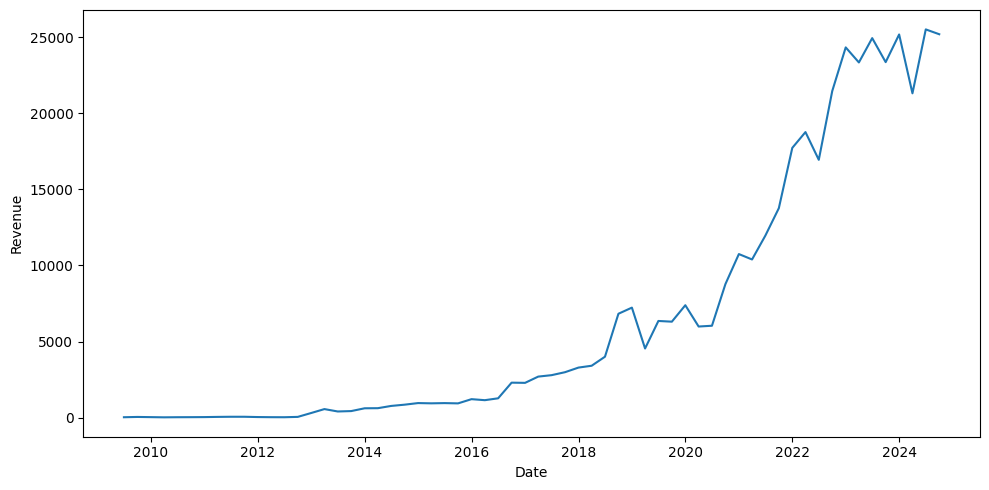

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize=(10, 5))

# Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Eliminar filas con NaN en la columna "Revenue"
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

# Convertir la columna "Revenue" a enteros
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(int)

# Graficar los datos
sns.lineplot(data=tesla_revenue, x="Date", y="Revenue")

plt.tight_layout()
plt.show()


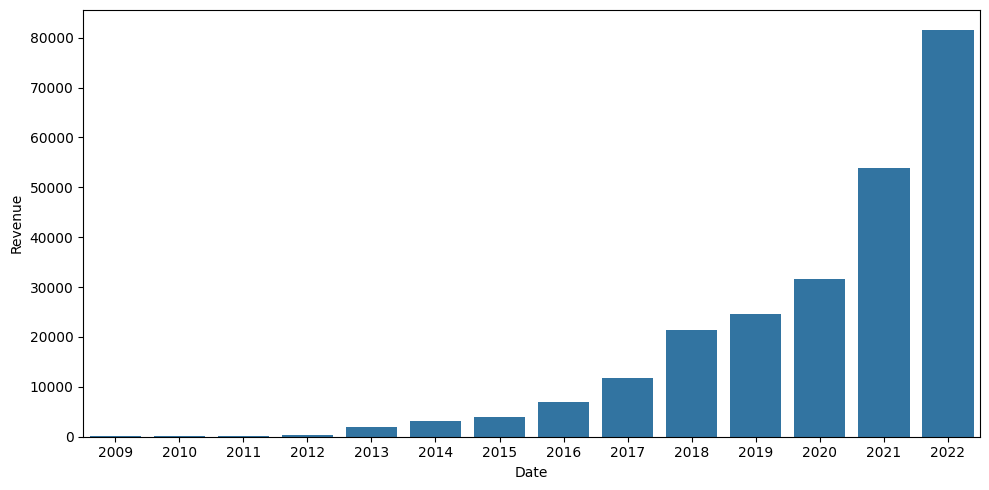

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Eliminar filas con NaN en la columna "Revenue"
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

# Convertir la columna "Revenue" a enteros
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(int)

# Agrupar por año y sumar los ingresos
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year)["Revenue"].sum().reset_index()

# Crear la gráfica
fig, axis = plt.subplots(figsize=(10, 5))

sns.barplot(data=tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023], x="Date", y="Revenue")

plt.tight_layout()
plt.show()


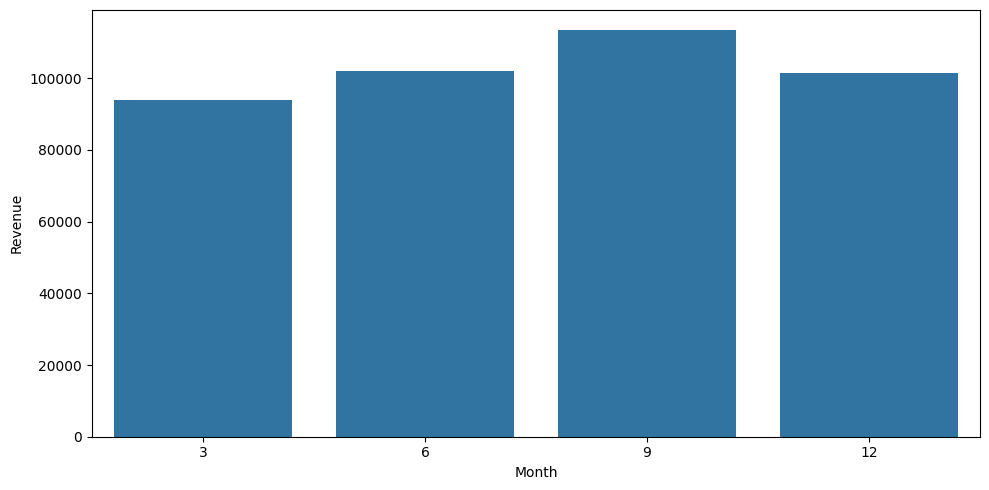

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Eliminar filas con NaN en la columna "Revenue"
tesla_revenue = tesla_revenue.dropna(subset=["Revenue"])

# Convertir la columna "Revenue" a enteros
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(int)

# Crear una columna nueva para el mes
tesla_revenue["Month"] = tesla_revenue["Date"].dt.month

# Agrupar por mes y sumar los ingresos
tesla_revenue_monthly = tesla_revenue.groupby("Month")["Revenue"].sum().reset_index()

# Crear la gráfica
fig, axis = plt.subplots(figsize=(10, 5))

sns.barplot(data=tesla_revenue_monthly, x="Month", y="Revenue")

plt.tight_layout()
plt.show()
